<a href="https://colab.research.google.com/github/Nimisha0127/CyberSecurity/blob/master/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Topic - Analysis of how people tend to spread rumours on social media by looking at the conversational threads**

### **Data Collection** - 
Collected tweets from the streaming API relating to newsworthy events that could potentially prompt the initiation and propagation of rumours. Selected rumours were then captured in the form of conversation threads.

*   Candidate rumourous stories from Twitter were collected. 
*   Second, journalists in the research team selected from these candidate rumours those that met the rumour criteria and identified the tweets that actually introduced them. 
*   Finally, associated conversations for these rumour-introducing tweets were collected and annotated using an annotation scheme specifically crafted for this purpose.






### **Attributes** -
* The datasets consist of rumour stories, represented by squares, which can be one of true (green), false (red), or unverified (orange). 
* Each of the rumour stories has a number of rumour threads associated with it, which is represented as black lines that form a timeline where threads are sorted by time. 
* When a story is true or false, the journalists also pick, within the story’s timeline, one tweet as the resolving tweet. 


### **Data Instances** - 
For the purposes of this study, the focus was on the **19991 tweets** annotated as rumourous. These rumourous tweets were collected and annotated in three different languages: English, German and French. 

All the replies to the 584 rumourous source tweets for the nine events in the dataset were also looked at. Collection of tweet IDs of all the tweets replying to the source tweet, i.e. the conversational thread, from which we can form the whole tree was done. Their, metadata was also collected.

### **Data Annotation** - 
The annotation work performed by the journalists was twofold
* annotation of each source tweet as being a rumour or not
* grouping of source tweets into stories

**The outcome of the annotation work was summarized in a table containing** -
* 61 attributes
* It has five instances for the five events under consideration


### **Target Label** -
The target label is Rumour for each Thread id and Tweet id

### **ML task type** - Classification

### **Visualizations** - 
Some of the visualizations needed would include- 
* Charts to visualise, in all, 103 rumours which remain unverified, 159 which were later proven, and 68 which were found to be false
* Plotting distribution of delays in resolving false and true rumours to look at the delay between a rumour being posted for the first time on Twitter and the rumour being resolved as being either true or false
* Plotting to shows networks of interactions between users, the connections being coloured according to their accuracy.
* Table for showing percentages of retweets for unverified, accurate, and inaccurate tweets.
* We further examine these retweet networks by looking at the time in which the retweets occur. We want to know the extent to which each type of rumour is retweeted, as well as whether there is a time-effect on rumour diffusion patterns. Hence, plotting average distribution of retweets for different rumourous stories (true, false) over time using histogram.
* Plotting a graph to compares the number of retweets that each type of tweet receives overall, compared with the average number of retweets that all rumours get.
* Graph to show distribution of support ratios before and after resolving tweets for true and false rumours, as well as for rumours that remain unverified.
* Support heatmap representing the number of rumours that spark more support,  more denials, the same number of each, or neither.
* Plot to compares the amount of discussion that different types of rumourous tweets spark before and after resolving tweets. 
* Plot to show shows the support ratio that different types of tweets (true, false, pre and post resolution) receive.
* Plotting the distribution of certainty ratios before and after resolving tweets for true and false rumours, as well as for rumours that remain unverified.
* Visualization of distribution of evidentiality ratios before and after resolving tweets for true and false rumours, as well as for rumours that remain unverified.
* Plot to show the statistics for the average follow ratio of users who express support, certainty and evidentiality for rumours at different veracity status levels.


**Dataset loading & Pre-processing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing libraries

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sys
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import dataset and its pre-processing**

In [ ]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
dt1 = pd.read_csv (r'/content/drive/MyDrive/aifinal/charliehebdof.csv', na_values = missing_value_formats, engine='python')
dt1


,text,user.handle,is_rumor,thread,in_reply_tweet,event,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.time_zone,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
0,Charlie Hebdo became well known for publishing...,BBCDanielS,0,5.540000e+17,NaN,charliehebdo,5.540000e+17,1,NaN,1379288282,144,0,4,0,1,1,195,152,4,0,1.420000e+12,0,0,0,0,0,0,0,33357,0,50112,644,159,17,8,0,33991,Eastern Time (US & Canada),1,1,1.370000e+12,0,12639981,12639981,6.0,1,16,0,0,0.091549,15,0.000000,8,2,1,1,0,0,2,0,1
1,"Now 10 dead in a shooting there today RT ""@BBC...",robbylevy,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,628636580,135,0,5,0,0,0,0,0,5,0,1.420000e+12,0,0,0,0,0,0,0,1061,0,34,0,0,4,7,0,102,NaN,1,1,1.340000e+12,0,12639981,12639981,NaN,0,8,0,0,0.037037,20,-0.050000,8,4,1,1,0,0,3,0,0
2,@BBCDanielS @BBCWorld I'm guessing this is bei...,ModerateInAll,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,514523937,128,0,6,0,0,0,0,1,6,0,1.420000e+12,0,0,0,0,0,0,0,9782,0,962,23,53,13,10,0,551,NaN,1,1,1.330000e+12,1,12639981,12639981,NaN,1,10,0,1,0.046875,17,0.000000,10,2,0,1,0,0,3,0,0
3,@BBCDanielS @BBCWorld why would you mention th...,GabTarquini,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,1623557642,122,0,5,0,0,0,0,0,5,0,1.420000e+12,0,0,0,0,0,0,0,4518,0,920,7,158,15,8,0,1922,Central Time (US & Canada),1,1,1.370000e+12,1,12639981,12639981,7.0,0,6,0,0,0.049180,19,-0.125000,6,4,1,3,1,0,2,0,0
4,@BBCDanielS @BBCWorld perps identified?,freethought41,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,61921063,105,0,1,1,0,0,0,0,1,0,1.420000e+12,0,0,0,0,0,0,0,23141,0,3070,80,143,20,10,0,3071,NaN,1,0,1.250000e+12,1,12442797,10151144,NaN,4,11,0,0,0.085714,14,0.500000,4,2,1,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37246,@VoiceOfZouis @iankeithtom y'a quoi au Trocad̩...,featstyIes,1,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,8.070950e+05,125359666,17,0,1,0,0,0,0,0,1,0,1.420000e+12,0,0,0,0,0,0,0,17068,0,291,20,79,15,8,0,591,Madrid,1,0,1.270000e+12,1,16777215,0,0.0,0,0,0,1,0.000000,3,-0.175000,0,0,1,0,0,0,0,0,0
37247,@featstyIes @iankeithtom il y a un homme arm̩ ...,VoiceOfZouis,1,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,2.963681e+09,858579492,104,0,2,0,0,0,0,0,2,0,1.420000e+12,0,0,0,0,0,0,0,28089,0,933,7,115,9,7,0,1474,Atlantic Time (Canada),1,0,1.350000e+12,1,16777215,12639981,5.0,0,3,0,0,0.009615,19,0.500000,4,5,0,1,0,0,0,0,0
37248,@featstyIes @VoiceOfZouis @iankeithtom Y a un ...,emelinepcrd,1,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,8.070950e+05,255978615,51,0,1,0,0,0,0,0,1,0,1.420000e+12,0,0,0,0,0,0,0,913,0,130,0,11,16,12,0,333,Paris,1,0,1.300000e+12,1,0,2038303,0.0,0,1,0,0,0.058824,8,-0.200000,3,2,0,0,0,0,0,0,0
37249,@emelinepcrd @VoiceOfZouis @iankeithtom c du b...,featstyIes,1,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,8.070950e+05,858579492,81,0,1,0,0,0,0,1,1,0,1.420000e+12,0,0,0,0,0,0,0,28224,0,931,7,115,9,7,0,1471,Atlantic Time (Canada),1,0,1.350000e+12,1,16777215,12639981,5.0,3,5,0,0,0.024691,14,-0.300000,3,3,1,2,0,1,2,0,0


In [ ]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
dt2 = pd.read_csv (r'/content/drive/MyDrive/aifinal/fergusonf.csv', na_values = missing_value_formats, engine='python')
dt2

,text,user.handle,is_rumor,thread,in_reply_tweet,event,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.time_zone,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
0,Black teenage boys are not men. They are child...,annaxsweat,0,4.990000e+17,NaN,ferguson,4.990000e+17,1,NaN,1668303476,62,0,0,0,1,1,221,54,0,0,1.410000e+12,0,0,0,0,0,0,0,15739,0,881,39,97,12,11,0,669,Arizona,1,1,1.380000e+12,1,12639981,12639981.0,2.0,2.0,10.0,0.0,0.0,0.096774,8.0,0.000000,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Black teenage boys are not men. They are child...,annaxsweat,0,4.990000e+17,4.990000e+17,ferguson,5.000000e+17,0,1.668303e+09,2332360083,79,0,2,0,0,0,0,0,2,0,1.410000e+12,0,0,0,0,0,0,0,788,0,73,1,69,14,13,0,58,NaN,1,1,1.390000e+12,0,12639981,12639981.0,NaN,2.0,3.0,0.0,0.0,0.063291,12.0,0.000000,6.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
2,@annaxsweat @NeoSoulPol Same thing when #Trayv...,NavyDad0007,0,4.990000e+17,4.990000e+17,ferguson,4.990000e+17,0,1.668303e+09,52503887,91,0,2,0,0,0,0,0,2,0,1.410000e+12,0,0,0,0,0,0,0,78536,0,1684,90,127,6,15,0,2001,Central Time (US & Canada),1,0,1.250000e+12,0,12442797,10151144.0,0.0,1.0,2.0,0.0,0.0,0.054945,12.0,0.100000,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,@annaxsweat http://t.co/Z7Qm4iaoSR,bells110,0,4.990000e+17,4.990000e+17,ferguson,4.990000e+17,0,1.668303e+09,177813214,49,0,1,0,0,0,0,0,1,0,1.410000e+12,0,0,0,0,0,0,0,17839,0,903,15,154,15,12,0,869,Pacific Time (US & Canada),1,0,1.280000e+12,1,10066329,0.0,2.0,1.0,1.0,0.0,0.0,0.122449,8.0,0.000000,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,@annaxsweat #StopThugCops We have to take acti...,bells110,0,4.990000e+17,4.990000e+17,ferguson,4.990000e+17,0,5.796172e+06,70843031,127,0,1,0,0,0,0,0,1,0,1.410000e+12,0,0,1,1,0,0,0,37121,0,1111,69,84,15,15,0,369,Eastern Time (US & Canada),0,0,1.250000e+12,0,1579550,657930.0,1.0,3.0,4.0,0.0,1.0,0.055118,21.0,0.800000,10.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17737,@kevinwmiller @AmeenaGK i got no idea what the...,retrocombine,1,5.000000e+17,5.000000e+17,ferguson,5.000000e+17,0,2.725580e+09,14305530,114,0,1,0,0,0,0,10,1,0,1.410000e+12,0,0,0,0,0,0,0,18250,1,131664,6931,74,11,8,0,74,Eastern Time (US & Canada),1,0,1.210000e+12,1,4473924,4473924.0,1.0,2.0,5.0,0.0,0.0,0.043860,18.0,0.029762,4.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
17738,@kevinwmiller @retrocombine What happened BEFO...,AmeenaGK,1,5.000000e+17,5.000000e+17,ferguson,5.000000e+17,0,2.725580e+09,51894422,137,0,1,0,0,2,0,0,1,0,1.410000e+12,0,0,0,0,0,0,0,121592,0,1495,26,49,15,12,0,936,Pacific Time (US & Canada),1,0,1.250000e+12,1,0,1250582.0,2.0,0.0,8.0,0.0,0.0,0.481481,19.0,-0.166667,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17739,@AmeenaGK @retrocombine If it happened? How el...,kevinwmiller,1,5.000000e+17,5.000000e+17,ferguson,5.000000e+17,0,2.725580e+09,1325972947,67,0,1,0,0,0,0,1,1,0,1.410000e+12,0,0,0,0,0,0,0,69,0,30,1,108,12,15,0,186,NaN,1,1,1.370000e+12,1,12639981,12639981.0,NaN,3.0,4.0,1.0,0.0,0.059701,10.0,0.000000,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17740,17 year old unarmed kid shot ten times by poli...,inthefade,1,5.000000e+17,5.000000e+17,ferguson,5.000000e+17,0,2.72

In [ ]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
dt3 = pd.read_csv (r'/content/drive/MyDrive/aifinal/germanwings-crashf.csv', na_values = missing_value_formats, engine='python')
dt3

,text,user.handle,is_rumor,thread,in_reply_tweet,event,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.time_zone,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
0,#Últimahora Es tracta d'un aparell de Germanwi...,324cat,0,5.803330e+17,NaN,germanwings-crash,5.803330e+17,1,NaN,7587032,135,0,0,1,1,2,88,19,0,0,1.427200e+12,0,0,0,0,0,0,0,133453,1,1964051,15444,120,8,7,0,17,London,1,0,1.184860e+12,1,0,0,NaN,2,29,0,0,0.111111,14,0.000000,8,0,2,0,0,0,0,0,1
1,“@324cat: #Últimahora Es tracta d'un aparell d...,senyera,0,5.803330e+17,5.800000e+17,germanwings-crash,5.803340e+17,0,7.587032e+06,716785466,63,0,1,0,0,1,0,0,1,0,1.427200e+12,0,0,0,0,0,0,0,8158,0,540,20,113,14,8,0,1770,NaN,1,1,1.343250e+12,1,12639981,12639981,NaN,1,2,0,0,0.079365,10,-0.195000,4,1,1,0,0,0,0,0,0
2,@senyera @324cat 148 pasajeros 142+6,GamersClassic,0,5.803330e+17,5.800000e+17,germanwings-crash,5.803720e+17,0,2.668765e+09,288730262,121,0,2,0,0,0,0,0,2,0,1.427210e+12,0,0,0,0,1,0,1,5934,0,1102,42,149,18,15,0,917,Berlin,1,0,1.303900e+12,0,16777215,11329238,1.0,0,5,0,0,0.033058,21,0.000000,6,2,4,0,0,0,0,0,0
3,@senyera @324cat dice el ministro frances que ...,GamersClassic,0,5.803330e+17,5.800000e+17,germanwings-crash,5.803800e+17,0,2.887303e+08,2668764799,56,0,2,0,0,0,0,0,2,0,1.427210e+12,0,0,0,0,0,0,0,198,0,12,0,84,10,11,0,66,NaN,0,0,1.406020e+12,1,0,0,NaN,0,1,0,0,0.089286,8,0.200000,5,2,0,0,0,0,0,0,0
4,Route map now being shared by http://t.co/LZkO...,BBCRosAtkins,0,5.803330e+17,5.800000e+17,germanwings-crash,5.803340e+17,0,7.587032e+06,367907778,139,0,1,1,1,2,0,2,1,0,1.427200e+12,0,0,0,0,0,0,0,4902,0,647,20,66,12,11,0,1362,Amsterdam,1,0,1.315160e+12,1,13382502,16737945,1.0,3,26,0,0,0.132353,14,-0.600000,8,1,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,@Hairbear64 @seanhannity @greta @act4america @...,gegco,1,5.813880e+17,5.810000e+17,germanwings-crash,5.814790e+17,0,2.280470e+09,1038003991,29,0,2,0,0,0,0,0,2,0,1.427470e+12,0,0,0,0,0,0,0,1504,0,49,1,0,4,10,0,84,NaN,1,0,1.356550e+12,0,0,0,NaN,0,0,0,0,0.172414,4,0.000000,4,0,0,0,0,0,0,0,0
4485,@stay_classy187 @seanhannity @greta @act4ameri...,gegco,1,5.813880e+17,5.810000e+17,germanwings-crash,5.813950e+17,0,2.482271e+09,31129083,53,0,2,0,0,0,0,0,2,0,1.427450e+12,0,0,0,0,0,1,1,350,0,102,9,92,11,15,0,144,Vienna,1,1,1.239720e+12,1,12639981,12639981,1.0,4,5,0,0,0.056604,5,0.250000,2,1,1,0,0,0,0,0,0
4486,@Hairbear64 @gegco @seanhannity @greta @act4am...,dj1darrell,1,5.813880e+17,5.810000e+17,germanwings-crash,5.813900e+17,0,2.280470e+09,2653328672,72,0,1,0,0,0,0,0,1,0,1.427450e+12,0,0,0,0,0,1,1,75,0,10,0,0,13,11,0,44,Vienna,1,0,1.405590e+12,0,16777215,1710879,1.0,1,4,0,0,0.152778,12,0.000000,4,3,1,1,0,1,0,0,0
4487,@dj1darrell @gegco @seanhannity @greta @act4am...,Hairbear64,1,5.813880e+17,5.810000e+17,germanwings-crash,5.813890e+17,0,2.280470e+09,2482271094,97,0,2,0,0,0,0,5,2,0,1.427450e+12,0,0,0,0,0,0,0,1810,0,62,1,0,18,14,0,131,Berlin,1,1,1.399470e+12,0,12639981,12639981,1.0,1,6,0,0,0.051546,14,0.455556,6,1,1,0,0,0,1,0,0


In [ ]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
dt4 = pd.read_csv (r'/content/drive/MyDrive/aifinal/ottawashootingf.csv', na_values = missing_value_formats, engine='python')
dt4

,text,user.handle,is_rumor,thread,in_reply_tweet,event,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.time_zone,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
0,Ottawa police are confirming a shooting at the...,CBCOttawa,0,5.249570e+17,NaN,ottawashooting,5.249570e+17,1,NaN,268416076,133,0,0,0,0,2,169,107,0,0,1.413990e+12,0,0,0,0,0,0,0,49663,0,23781,477,115,15,8,0,8108,Pacific Time (US & Canada),1,0,1.300470e+12,1,6214876,39353,3.0,1,9,0,0,0.022727,18,0.433333,6,5,2,1,1,0,0,0,0
1,.@dominiquehardy @CBCOttawa related to St-Jean ?,petitmetroide,0,5.249570e+17,5.250000e+17,ottawashooting,5.249600e+17,0,268416076.0,77254498,142,0,1,0,0,5,0,0,1,0,1.414000e+12,0,0,0,0,0,0,0,114600,0,5701,372,126,14,15,0,4294,Eastern Time (US & Canada),1,0,1.253900e+12,1,16777215,14698046,0.0,3,14,0,0,0.084507,21,-0.100000,12,2,1,2,2,0,0,0,0
2,@petitmetroide @CBCOttawa Il est tôt pour une ...,dominiquehardy,0,5.249570e+17,5.250000e+17,ottawashooting,5.249610e+17,0,268416076.0,2559128258,32,0,1,1,0,0,0,0,1,0,1.414000e+12,0,0,0,0,0,0,0,163,0,83,2,0,6,7,0,539,NaN,1,1,1.402410e+12,0,12639981,12639981,NaN,1,7,0,0,0.187500,2,0.000000,2,0,0,0,0,0,0,0,1
3,Prudence avant d'en savoir plus “@CBCOttawa: O...,StephBerthomet,0,5.249570e+17,5.250000e+17,ottawashooting,5.249860e+17,0,268416076.0,335426737,136,0,1,0,0,2,0,0,1,0,1.414000e+12,0,0,0,0,0,0,0,80189,0,2522,89,137,5,8,0,2474,Eastern Time (US & Canada),1,0,1.310660e+12,1,16777215,12639981,0.0,2,7,0,0,0.102941,17,0.000000,8,3,2,1,0,0,0,0,0
4,@StephBerthomet Ça va être rapporté partout sa...,RenkoQC,0,5.249570e+17,5.250000e+17,ottawashooting,5.250180e+17,0,860648802.0,298629655,64,0,2,0,0,0,0,0,2,0,1.414010e+12,0,0,0,0,0,0,0,57597,0,4814,75,65,16,12,0,4765,Eastern Time (US & Canada),1,0,1.305390e+12,1,0,12639981,0.0,1,5,0,0,0.093750,9,0.000000,4,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,@Mairsy27 4real tho,TdotBrownMon,1,5.249350e+17,NaN,ottawashooting,5.249350e+17,1,NaN,3108351,128,0,0,1,0,0,115,15,0,0,1.413990e+12,0,0,0,0,0,0,0,96163,1,5191021,82111,152,19,3,0,952,Eastern Time (US & Canada),0,0,1.175410e+12,1,16777215,15594229,0.0,2,10,0,0,0.046875,19,0.050000,8,4,3,0,0,0,0,0,1
12280,@TdotBrownMon @Mairsy27 that soldier had nothi...,thejangler6,1,5.249350e+17,5.250000e+17,ottawashooting,5.249740e+17,0,3108351.0,2826651588,89,0,1,0,0,0,0,0,1,0,1.414000e+12,0,0,0,0,0,0,0,324,0,22,0,107,5,8,0,87,NaN,1,1,1.411410e+12,1,12639981,12639981,NaN,0,0,0,0,0.044944,15,0.160000,6,1,2,0,0,0,0,0,0
12281,@thejangler6 @Mairsy27 exactly is not the pers...,TdotBrownMon,1,5.249350e+17,5.250000e+17,ottawashooting,5.249380e+17,0,3108351.0,352068186,44,0,2,0,0,0,0,0,2,0,1.413990e+12,0,0,0,0,1,0,1,7649,0,400,0,10,11,11,0,290,Central Time (US & Canada),0,0,1.312950e+12,1,16777215,4486799,1.0,2,3,0,0,0.090909,7,0.000000,4,2,0,0,0,0,0,0,0
12282,@allstaradele @CP24 what a hero! Gave his life...,BehramShah,1,5.249350e+17,5.250000e+17,ottawashooting,5.249370e+17,0,3108351.0,2310735727,56,0,1,0,0,0,0,0,1,0,1.413990e+12,0,0,0,0,0,0,0,1069,0,2303,1,142,18,13,0,47,Atlantic Time (Canada),1,0,1.390690e+12,1,16777215,1261901,1.0,0,0,1,1,0.053571,10,-0.16

In [ ]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
dt5 = pd.read_csv (r'/content/drive/MyDrive/aifinal/sydneysiegef.csv', na_values = missing_value_formats, engine='python')
dt5

,text,user.handle,is_rumor,thread,in_reply_tweet,event,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.time_zone,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
0,A police operation is underway in Martin Place...,nswpolice,0,5.444270e+17,NaN,sydneysiege,5.444270e+17,1,NaN,61436584,139,0,0,0,0,1,462,535,0,0,1.418640e+12,0,0,0,0,0,0,0,3944,0,2772,104,62,10,11,0,925,NaN,1,0,1.248940e+12,1,12639981,12639981,NaN,3,7,0,1,0.028777,26,0.166667,5,6,0,4,2,1,0,0,0
1,“@nswpolice: A police operation is underway in...,tamarajewel,0,5.444270e+17,5.440000e+17,sydneysiege,5.453230e+17,0,6.143658e+07,887450286,133,0,1,0,0,1,0,0,1,0,1.418850e+12,0,0,0,0,0,1,1,536,0,663,6,35,17,13,0,1023,New Caledonia,1,0,1.350500e+12,1,15658734,1250582,0.0,1,8,0,0,0.030303,25,0.000000,5,5,0,3,2,0,1,0,0
2,RT @nswpolice: A police operation is underway ...,lizziejane,0,5.444270e+17,5.450000e+17,sydneysiege,5.445090e+17,0,1.931777e+07,17872080,48,0,1,0,0,0,0,1,1,0,1.418660e+12,0,0,0,0,0,0,0,359111,0,11214,739,146,10,10,0,11792,Perth,1,0,1.228410e+12,1,1381780,2074111,3.0,1,1,0,0,0.062500,8,0.600000,3,2,0,0,1,0,0,0,0
3,“@nswpolice: A police operation is underway in...,carlsb,0,5.444270e+17,5.440000e+17,sydneysiege,5.445060e+17,0,6.143658e+07,30726225,48,0,1,0,0,0,0,0,1,0,1.418660e+12,0,0,0,0,0,0,0,3782,0,28,1,6,9,7,0,155,Amsterdam,1,1,1.239570e+12,1,12639981,12639981,10.0,1,3,0,0,0.083333,6,0.500000,3,0,1,0,0,0,0,0,0
4,RT @nswpolice: A police operation is underway ...,timsout,0,5.444270e+17,5.440000e+17,sydneysiege,5.445060e+17,0,6.143658e+07,19317766,38,0,2,0,0,0,0,0,2,0,1.418660e+12,0,0,0,0,0,1,1,13770,0,13055,241,86,16,7,0,1679,Sydney,0,0,1.232590e+12,1,0,1705651,0.0,0,3,0,0,0.131579,5,0.000000,3,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20002,“@NBCNews: BREAKING: Three Sydney hostages fle...,Natalie14News,1,5.443030e+17,5.440000e+17,sydneysiege,5.443060e+17,0,2.578699e+09,2738152820,26,0,2,0,0,0,0,1,2,0,1.418610e+12,0,0,0,0,0,0,0,320,0,79,0,0,5,10,0,251,NaN,1,1,1.408220e+12,0,12639981,12639981,NaN,0,0,0,0,0.291667,2,0.000000,2,0,0,0,0,0,0,0,0
20003,updates all night on @msnbc “@NBCNews: BREAKIN...,OhMyGOFF,1,5.443030e+17,5.440000e+17,sydneysiege,5.443030e+17,0,5.402612e+06,2459797201,101,0,1,0,0,0,0,0,1,0,1.418610e+12,0,0,0,0,0,1,1,71,0,5,0,40,10,12,0,46,NaN,1,1,1.398260e+12,1,12639981,12639981,NaN,0,1,0,0,0.089109,16,0.000000,6,4,1,0,0,0,0,0,0
20004,@RickMontanez “@NBCNews: BREAKING: Three Sydne...,Melissa_Sis,1,5.443510e+17,NaN,sydneysiege,5.443510e+17,1,NaN,25210650,116,0,0,0,0,1,124,49,0,0,1.418620e+12,0,0,1,1,0,0,0,12370,1,16012,481,145,11,12,0,1437,Sydney,1,0,1.237430e+12,1,14266750,9131051,0.0,3,7,0,0,0.025862,21,-0.095833,8,4,0,1,1,0,0,0,0
20005,@OhMyGOFF With ya Ang. So far no one's been co...,JenEf8,1,5.443510e+17,5.440000e+17,sydneysiege,5.443510e+17,0,2.521065e+07,337597451,69,0,2,0,0,0,0,0,2,0,1.418620e+12,0,0,1,1,1,0,1,96,0,10,0,0,12,12,0,65,Yakutsk,1,1,1.310980e+12,0,12639981,12639981,1.0,0,4,0,0,0.000000,10,-0.312500,3,3,0,1,0,0,1,0,0


In [ ]:
#Merging datasets into one 

df=dt1.append(dt2)
df=df.append(dt3)
df=df.append(dt4)
df=df.append(dt5)
df

,text,user.handle,is_rumor,thread,in_reply_tweet,event,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.time_zone,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
0,Charlie Hebdo became well known for publishing...,BBCDanielS,0,5.540000e+17,NaN,charliehebdo,5.540000e+17,1,NaN,1379288282,144,0,4,0,1,1,195,152,4,0,1.420000e+12,0,0,0,0,0,0,0,33357,0,50112,644,159,17,8,0,33991,Eastern Time (US & Canada),1,1,1.370000e+12,0,12639981,12639981.0,6.0,1.0,16.0,0.0,0.0,0.091549,15.0,0.000000,8.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0
1,"Now 10 dead in a shooting there today RT ""@BBC...",robbylevy,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,628636580,135,0,5,0,0,0,0,0,5,0,1.420000e+12,0,0,0,0,0,0,0,1061,0,34,0,0,4,7,0,102,NaN,1,1,1.340000e+12,0,12639981,12639981.0,NaN,0.0,8.0,0.0,0.0,0.037037,20.0,-0.050000,8.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0
2,@BBCDanielS @BBCWorld I'm guessing this is bei...,ModerateInAll,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,514523937,128,0,6,0,0,0,0,1,6,0,1.420000e+12,0,0,0,0,0,0,0,9782,0,962,23,53,13,10,0,551,NaN,1,1,1.330000e+12,1,12639981,12639981.0,NaN,1.0,10.0,0.0,1.0,0.046875,17.0,0.000000,10.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
3,@BBCDanielS @BBCWorld why would you mention th...,GabTarquini,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,1623557642,122,0,5,0,0,0,0,0,5,0,1.420000e+12,0,0,0,0,0,0,0,4518,0,920,7,158,15,8,0,1922,Central Time (US & Canada),1,1,1.370000e+12,1,12639981,12639981.0,7.0,0.0,6.0,0.0,0.0,0.049180,19.0,-0.125000,6.0,4.0,1.0,3.0,1.0,0.0,2.0,0.0,0.0
4,@BBCDanielS @BBCWorld perps identified?,freethought41,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,61921063,105,0,1,1,0,0,0,0,1,0,1.420000e+12,0,0,0,0,0,0,0,23141,0,3070,80,143,20,10,0,3071,NaN,1,0,1.250000e+12,1,12442797,10151144.0,NaN,4.0,11.0,0.0,0.0,0.085714,14.0,0.500000,4.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20002,“@NBCNews: BREAKING: Three Sydney hostages fle...,Natalie14News,1,5.443030e+17,5.440000e+17,sydneysiege,5.443060e+17,0,2.578699e+09,2738152820,26,0,2,0,0,0,0,1,2,0,1.418610e+12,0,0,0,0,0,0,0,320,0,79,0,0,5,10,0,251,NaN,1,1,1.408220e+12,0,12639981,12639981.0,NaN,0.0,0.0,0.0,0.0,0.291667,2.0,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20003,updates all night on @msnbc “@NBCNews: BREAKIN...,OhMyGOFF,1,5.443030e+17,5.440000e+17,sydneysiege,5.443030e+17,0,5.402612e+06,2459797201,101,0,1,0,0,0,0,0,1,0,1.418610e+12,0,0,0,0,0,1,1,71,0,5,0,40,10,12,0,46,NaN,1,1,1.398260e+12,1,12639981,12639981.0,NaN,0.0,1.0,0.0,0.0,0.089109,16.0,0.000000,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20004,@RickMontanez “@NBCNews: BREAKING: Three Sydne...,Melissa_Sis,1,5.443510e+17,NaN,sydneysiege,5.443510e+17,1,NaN,25210650,116,0,0,0,0,1,124,49,0,0,1.418620e+12,0,0,1,1,0,0,0,12370,1,16012,481,145,11,12,0,1437,Sydney,1,0,1.237430e+12,1,14266750,9131051.0,0.0,3.0,7.0,0.0,0.0,0.025862,21.0,-0.095833,8.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
20005,@OhMyGOFF With ya Ang. So far no one's been co...,JenEf8,1,5.443510e+17,5.440000e+17,sydneysiege,5.443510e+17,0,2.521065e+07,33759745

**Dataset scheme:**

*   "is_rumor": 1 if rumor else 0
*   "is_source_tweet" : 1 if source id there else 0
*   "is_truncated": 1 if truncated else 0
*   "has_smile_emoji": 1 if "😊" else 0
*   "sensitive": 1 if sensitive else 0
*   "has_place": 1 if place is there else 0
*   "has_coords": 1 if it has coordinates else 0
*   "has_quest": 1 if it has question else 0
*   "has_exclaim": 1 if it has exclaim else 0
*   "has_quest_or_exclaim": 1 if it has a question/exclaim else 0
*   "user.verified": 1 if user is verified else 0
*   "user.notifications": 1 if user notifications are there else 0
*   "user.desc_length": user description length if it is there else 0
*   "user.has_bg_img": 1 if user bg image is there else 0
*   "user.default_pic": 1 if user profile pic is there else 0
*   "user.location": 1 if user location is there else 0






In [ ]:
print(type(df))
print(len(df))

<class 'pandas.core.frame.DataFrame'>
91773


In [ ]:
#Checking null values
bool_n = pd.isnull(df)
print(bool_n)

# handling null values for colums containing text
df["text"].fillna("No text", inplace = True) 
df["user.handle"].fillna("No handle", inplace = True) 
df["event"].fillna("Event not specified", inplace = True) 
df["user.time_zone"].fillna("Time zone not specified", inplace = True)
df 

# replacing the numeric null values with 0
df.fillna(0)

        text  user.handle  ...  Adverb  has_url_in_text
0      False        False  ...   False            False
1      False        False  ...   False            False
2      False        False  ...   False            False
3      False        False  ...   False            False
4      False        False  ...   False            False
...      ...          ...  ...     ...              ...
20002  False        False  ...   False            False
20003  False        False  ...   False            False
20004  False        False  ...   False            False
20005  False        False  ...   False            False
20006  False        False  ...   False            False

[91773 rows x 61 columns]


,text,user.handle,is_rumor,thread,in_reply_tweet,event,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.time_zone,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
0,Charlie Hebdo became well known for publishing...,BBCDanielS,0,5.540000e+17,0.000000e+00,charliehebdo,5.540000e+17,1,0.000000e+00,1379288282,144,0,4,0,1,1,195,152,4,0,1.420000e+12,0,0,0,0,0,0,0,33357,0,50112,644,159,17,8,0,33991,Eastern Time (US & Canada),1,1,1.370000e+12,0,12639981,12639981.0,6.0,1.0,16.0,0.0,0.0,0.091549,15.0,0.000000,8.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0
1,"Now 10 dead in a shooting there today RT ""@BBC...",robbylevy,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,628636580,135,0,5,0,0,0,0,0,5,0,1.420000e+12,0,0,0,0,0,0,0,1061,0,34,0,0,4,7,0,102,Time zone not specified,1,1,1.340000e+12,0,12639981,12639981.0,0.0,0.0,8.0,0.0,0.0,0.037037,20.0,-0.050000,8.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0
2,@BBCDanielS @BBCWorld I'm guessing this is bei...,ModerateInAll,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,514523937,128,0,6,0,0,0,0,1,6,0,1.420000e+12,0,0,0,0,0,0,0,9782,0,962,23,53,13,10,0,551,Time zone not specified,1,1,1.330000e+12,1,12639981,12639981.0,0.0,1.0,10.0,0.0,1.0,0.046875,17.0,0.000000,10.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
3,@BBCDanielS @BBCWorld why would you mention th...,GabTarquini,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,1623557642,122,0,5,0,0,0,0,0,5,0,1.420000e+12,0,0,0,0,0,0,0,4518,0,920,7,158,15,8,0,1922,Central Time (US & Canada),1,1,1.370000e+12,1,12639981,12639981.0,7.0,0.0,6.0,0.0,0.0,0.049180,19.0,-0.125000,6.0,4.0,1.0,3.0,1.0,0.0,2.0,0.0,0.0
4,@BBCDanielS @BBCWorld perps identified?,freethought41,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,61921063,105,0,1,1,0,0,0,0,1,0,1.420000e+12,0,0,0,0,0,0,0,23141,0,3070,80,143,20,10,0,3071,Time zone not specified,1,0,1.250000e+12,1,12442797,10151144.0,0.0,4.0,11.0,0.0,0.0,0.085714,14.0,0.500000,4.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20002,“@NBCNews: BREAKING: Three Sydney hostages fle...,Natalie14News,1,5.443030e+17,5.440000e+17,sydneysiege,5.443060e+17,0,2.578699e+09,2738152820,26,0,2,0,0,0,0,1,2,0,1.418610e+12,0,0,0,0,0,0,0,320,0,79,0,0,5,10,0,251,Time zone not specified,1,1,1.408220e+12,0,12639981,12639981.0,0.0,0.0,0.0,0.0,0.0,0.291667,2.0,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20003,updates all night on @msnbc “@NBCNews: BREAKIN...,OhMyGOFF,1,5.443030e+17,5.440000e+17,sydneysiege,5.443030e+17,0,5.402612e+06,2459797201,101,0,1,0,0,0,0,0,1,0,1.418610e+12,0,0,0,0,0,1,1,71,0,5,0,40,10,12,0,46,Time zone not specified,1,1,1.398260e+12,1,12639981,12639981.0,0.0,0.0,1.0,0.0,0.0,0.089109,16.0,0.000000,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20004,@RickMontanez “@NBCNews: BREAKING: Three Sydne...,Melissa_Sis,1,5.443510e+17,0.000000e+00,sydneysiege,5.443510e+17,1,0.000000e+00,25210650,116,0,0,0,0,1,124,49,0,0,1.418620e+12,0,0,1,1,0,0,0,12370,1,16012,481,145,11,12,0,1437,Sydney,1,0,1.237430e+12,1,14266750,9131051.0,0.0,3.0,7.0,0.0,0.0,0.025862,21.0,-0.095833,8.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
200

In [ ]:
print('Total Rumorous threads:')
print(len(df.loc[df['is_rumor']== 1]))
print('Total Non-Rumorous threads:')
print(len(df.loc[df['is_rumor']== 0]))

Total Rumorous threads:
19991
Total Non-Rumorous threads:
71782


In [ ]:
#Ratio of number of rumours to the number of non-rumours

r=len(df.loc[df['is_rumor']== 1])
nr=len(df.loc[df['is_rumor']== 0])
print('Ratio:')
ratio=r/nr
print(ratio)

Ratio:
0.27849600178317685


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91773 entries, 0 to 20006
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  91773 non-null  object 
 1   user.handle           91773 non-null  object 
 2   is_rumor              91773 non-null  int64  
 3   thread                91773 non-null  float64
 4   in_reply_tweet        85765 non-null  float64
 5   event                 91773 non-null  object 
 6   tweet_id              91773 non-null  float64
 7   is_source_tweet       91773 non-null  int64  
 8   in_reply_user         85777 non-null  float64
 9   user_id               91773 non-null  int64  
 10  tweet_length          91773 non-null  int64  
 11  symbol_count          91773 non-null  int64  
 12  user_mentions         91773 non-null  int64  
 13  urls_count            91773 non-null  int64  
 14  media_count           91773 non-null  int64  
 15  hashtags_count     

In [ ]:
df.head()

,text,user.handle,is_rumor,thread,in_reply_tweet,event,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.time_zone,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
0,Charlie Hebdo became well known for publishing...,BBCDanielS,0,5.540000e+17,NaN,charliehebdo,5.540000e+17,1,NaN,1379288282,144,0,4,0,1,1,195,152,4,0,1.420000e+12,0,0,0,0,0,0,0,33357,0,50112,644,159,17,8,0,33991,Eastern Time (US & Canada),1,1,1.370000e+12,0,12639981,12639981.0,6.0,1.0,16.0,0.0,0.0,0.091549,15.0,0.000,8.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0
1,"Now 10 dead in a shooting there today RT ""@BBC...",robbylevy,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,628636580,135,0,5,0,0,0,0,0,5,0,1.420000e+12,0,0,0,0,0,0,0,1061,0,34,0,0,4,7,0,102,Time zone not specified,1,1,1.340000e+12,0,12639981,12639981.0,NaN,0.0,8.0,0.0,0.0,0.037037,20.0,-0.050,8.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0
2,@BBCDanielS @BBCWorld I'm guessing this is bei...,ModerateInAll,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,514523937,128,0,6,0,0,0,0,1,6,0,1.420000e+12,0,0,0,0,0,0,0,9782,0,962,23,53,13,10,0,551,Time zone not specified,1,1,1.330000e+12,1,12639981,12639981.0,NaN,1.0,10.0,0.0,1.0,0.046875,17.0,0.000,10.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
3,@BBCDanielS @BBCWorld why would you mention th...,GabTarquini,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,1623557642,122,0,5,0,0,0,0,0,5,0,1.420000e+12,0,0,0,0,0,0,0,4518,0,920,7,158,15,8,0,1922,Central Time (US & Canada),1,1,1.370000e+12,1,12639981,12639981.0,7.0,0.0,6.0,0.0,0.0,0.049180,19.0,-0.125,6.0,4.0,1.0,3.0,1.0,0.0,2.0,0.0,0.0
4,@BBCDanielS @BBCWorld perps identified?,freethought41,0,5.540000e+17,5.540000e+17,charliehebdo,5.540000e+17,0,1.379288e+09,61921063,105,0,1,1,0,0,0,0,1,0,1.420000e+12,0,0,0,0,0,0,0,23141,0,3070,80,143,20,10,0,3071,Time zone not specified,1,0,1.250000e+12,1,12442797,10151144.0,NaN,4.0,11.0,0.0,0.0,0.085714,14.0,0.500,4.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0


**Visualisation**

In [ ]:
# Import dependencies for this notebook

import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns  
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime

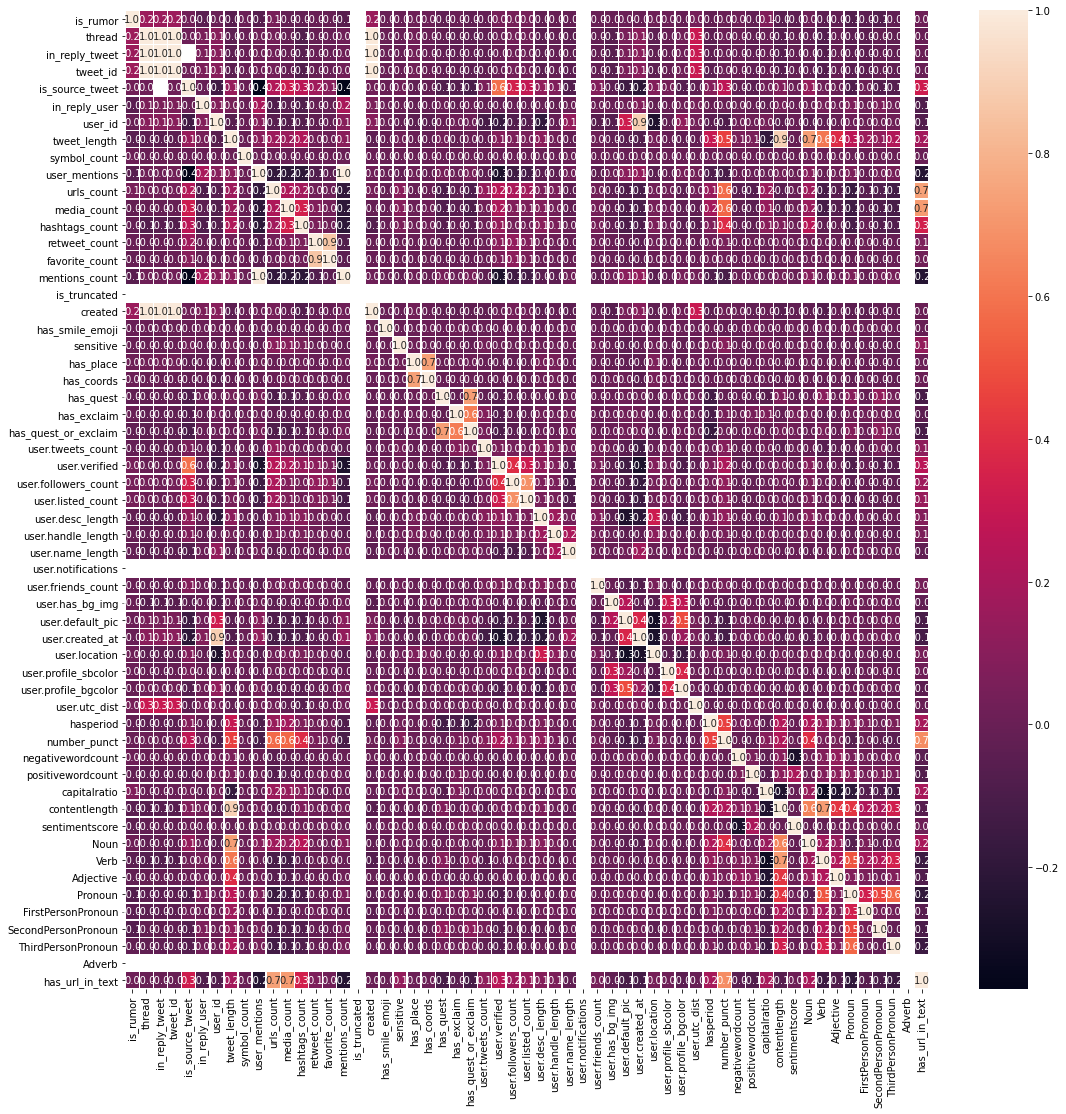

In [ ]:
#Heatmap

f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)

Text(0.5, 1.0, 'Distribution of Feature Values (All News Events)')

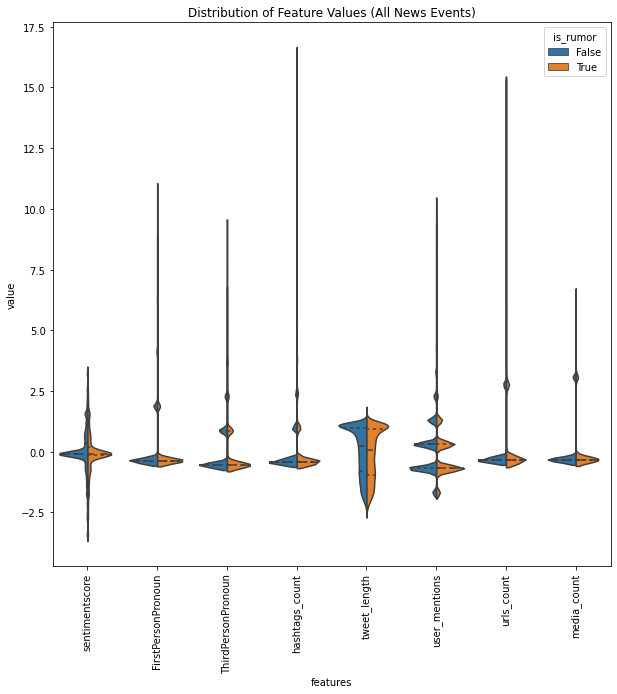

In [ ]:
#Distribution of Feature Values (All News Events) Violin plot

df[["is_source_tweet","is_rumor"]] = df[["is_source_tweet", "is_rumor"]].astype(bool)
y = df['is_rumor']
X = df[["sentimentscore", "FirstPersonPronoun", "ThirdPersonPronoun", "hashtags_count", "tweet_length", "user_mentions", "urls_count", "media_count"]]
X = (X - X.mean()) / X.std()  # normalize
dt = pd.concat([X, y], axis=1)
dt = pd.melt(dt, id_vars="is_rumor", var_name="features", value_name="value")
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="features", y='value',hue="is_rumor", data=dt, split=True, inner="quart")
plt.xticks(rotation=90)
ax.set_title("Distribution of Feature Values (All News Events)")

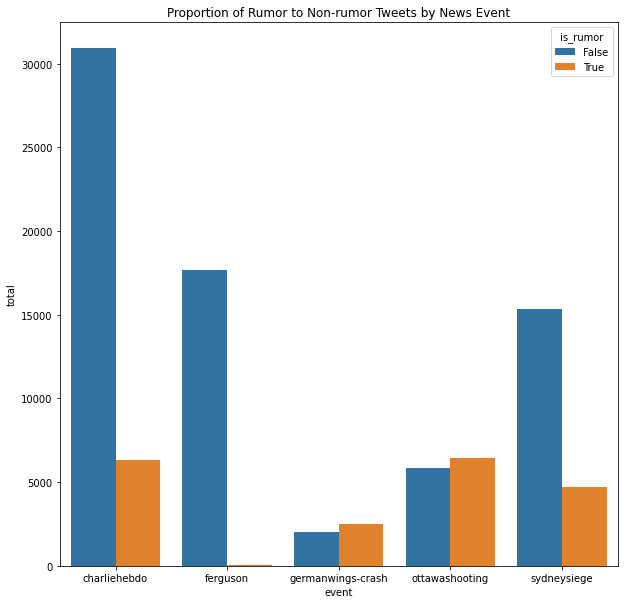

In [ ]:
#Proportion of Rumor to Non-Rumor tweets by events

twts_event_rumor = df[["event", "tweet_id", "is_rumor"]].groupby(["event", "is_rumor"]).agg(len) \
    .rename(columns={"tweet_id": "total"}).reset_index()
plt.figure(figsize=(10,10))
plt.title("Proportion of Rumor to Non-rumor Tweets by News Event")
ax = sns.barplot(x="event", y="total", hue="is_rumor", data=twts_event_rumor)

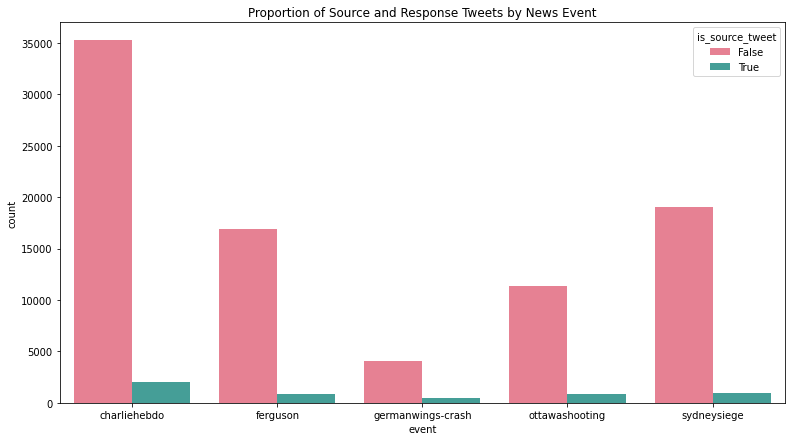

In [ ]:
#Proportion of Source and Response Tweets by News Event

plt.figure(figsize=(13,7))
plt.title("Proportion of Source and Response Tweets by News Event")
ax = sns.countplot(x="event", hue="is_source_tweet", data=df, palette="husl")

In [ ]:
thread_lengths = df.groupby(["event", "thread"]) \
    .agg({ "tweet_id": len, "is_rumor": max }) \
    .reset_index() \
    .rename(columns={"tweet_id": "thread_length"})[["event", "thread", "is_rumor", "thread_length"]]
thread_lengths.head()

,event,thread,is_rumor,thread_length
0,charliehebdo,5.530000e+17,True,29606.0
1,charliehebdo,5.540000e+17,True,7645.0
2,ferguson,4.980000e+17,False,2566.0
3,ferguson,4.990000e+17,False,3317.0
4,ferguson,5.000000e+17,True,11859.0


In [ ]:
thread_lengths.groupby("event").describe()

thread                ... thread_length         
                   count          mean  ...           75%      max
event                                   ...                       
charliehebdo         2.0  5.535000e+17  ...      24115.75  29606.0
ferguson             3.0  4.990000e+17  ...       7588.00  11859.0
germanwings-crash  140.0  5.808549e+17  ...         38.50    243.0
ottawashooting     146.0  5.249963e+17  ...        114.75    319.0
sydneysiege        245.0  5.443949e+17  ...        107.00    404.0

[5 rows x 16 columns]

Text(0.5, 1.0, 'Thread Length by Event and Rumor')

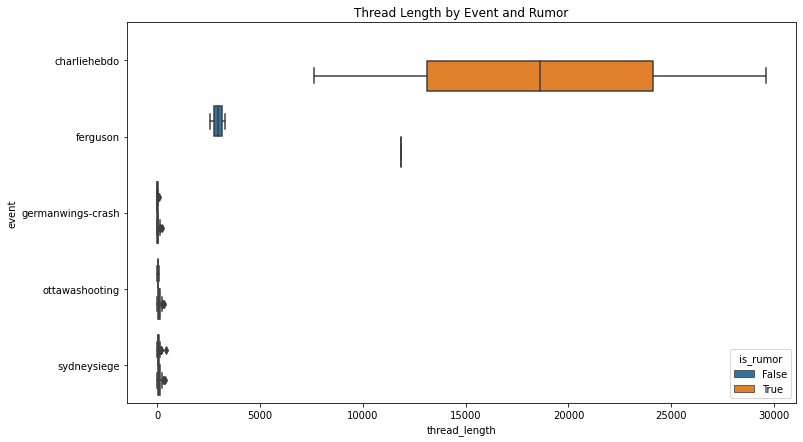

In [ ]:
#Thread Length by Event and Rumor

fig, axes = plt.subplots(figsize=(12,7))
ax = sns.boxplot(y="event", 
            x="thread_length", 
            hue="is_rumor", 
            data = thread_lengths)
ax.set_title("Thread Length by Event and Rumor")

**ML Task type: Classification**

For each of the nine given stories, we need to classify to identify the number of tweets associated with it. Also, annote each tweet as rumourous or non-rumourous.

Since the data is labelled, this is an instance of SUPERVISED MACHINE LEARNING.This would help us to find all kinds of hidden patterns in the data and find features which are useful.

We need to group the tweets as RUMOURS or NON-RUMOURS. Classification best suits our project.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.mlab as mlab

In [ ]:
df.fillna(-99999, inplace=True)
df = df.rename(columns={'user.time_zone':'U'})

In [ ]:
X =df.drop(["is_rumor","U","text","event","user.handle"],axis=1)
y=df["is_rumor"]
#y =df.iloc[:,2]
#y=y.astype('int')
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0, stratify=y)

In [ ]:
X_train.describe()

,thread,in_reply_tweet,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
count,4.588600e+04,4.588600e+04,4.588600e+04,45886.000000,4.588600e+04,4.588600e+04,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.0,4.588600e+04,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,4.588600e+04,45886.000000,4.588600e+04,45886.000000,45886.000000,45886.000000,45886.000000,45886.0,45886.000000,45886.000000,45886.000000,4.588600e+04,45886.000000,4.588600e+04,4.588600e+04,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.000000,45886.0,45886.000000
mean,5.384711e+17,5.036061e+17,5.385520e+17,0.056401,4.715173e+08,8.027579e+08,96.000240,0.000022,1.697947,0.109118,0.094081,0.287909,27.193697,14.092948,1.697947,0.0,1.417325e+12,0.000697,0.004228,0.043782,0.024474,0.151680,0.115961,0.252822,2.700823e+04,0.047945,8.220821e+04,862.217125,83.181515,11.473042,10.673713,0.0,1376.630367,0.917251,0.394761,1.311259e+12,0.710478,1.147700e+07,9.329737e+06,-40259.768617,1.201521,5.296997,0.055703,0.110840,0.081969,13.879528,0.025565,5.746916,2.352025,0.918210,0.661879,0.161967,0.217190,0.384714,0.0,0.167851
std,2.239783e+16,1.344402e+17,2.236506e+16,0.230696,7.794906e+08,9.493117e+08,38.111749,0.004668,1.010542,0.324666,0.292690,0.701676,509.264195,278.501287,1.010542,0.0,4.474025e+09,0.026399,0.064885,0.204613,0.154516,0.358715,0.320182,0.434635,1.233377e+05,0.213652,8.888712e+05,8150.380266,56.477675,4.435530,2.673064,0.0,7706.828384,0.275505,0.488805,6.364974e+10,0.453545,5.374657e+06,5.513090e+06,49044.933291,1.375287,4.488224,0.236462,0.331824,0.083161,6.480697,0.300553,2.885796,1.802198,1.020057,0.952999,0.443771,0.540916,0.711120,0.0,0.373738
min,4.980000e+17,-9.999900e+04,4.980000e+17,0.000000,-9.999900e+04,5.800000e+01,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.410000e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,1.140000e+12,0.000000,0.000000e+00,0.000000e+00,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,5.249590e+17,5.250000e+17,5.249710e+17,0.000000,1.694849e+07,6.853025e+07,64.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.414000e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800250e+03,0.000000,1.040000e+02,1.000000,31.000000,8.000000,9.000000,0.0,178.000000,1.000000,0.000000,1.250000e+12,0.000000,1.263998e+07,2.365988e+06,-99999.000000,0.000000,2.000000,0.000000,0.000000,0.035971,9.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,5.444680e+17,5.440000e+17,5.445040e+17,0.000000,8.741672e+07,3.313773e+08,104.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,1.418650e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.402000e+03,0.000000,4.440000e+02,7.000000,87.

In [ ]:
X_test.describe()

,thread,in_reply_tweet,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
count,4.588700e+04,4.588700e+04,4.588700e+04,45887.000000,4.588700e+04,4.588700e+04,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.0,4.588700e+04,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,4.588700e+04,45887.000000,4.588700e+04,4.588700e+04,45887.000000,45887.000000,45887.000000,45887.0,45887.000000,45887.000000,45887.000000,4.588700e+04,45887.000000,4.588700e+04,4.588700e+04,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000
mean,5.384680e+17,5.030763e+17,5.385483e+17,0.057228,4.666114e+08,8.095907e+08,95.870835,0.000065,1.685401,0.107678,0.096498,0.297840,26.589056,15.739011,1.685401,0.0,1.417322e+12,0.000545,0.003901,0.042757,0.023013,0.152723,0.114390,0.251531,2.540451e+04,0.046266,7.657932e+04,8.610618e+02,82.817574,11.465644,10.660013,0.0,1419.320701,0.915270,0.391963,1.311592e+12,0.708436,1.147823e+07,9.292528e+06,-40816.792359,-0.983961,3.156188,-2.123586,-2.067666,-2.097389,11.683832,-2.152764,3.566980,0.166256,-1.261665,-1.522762,-2.017434,-1.968902,-1.798004,-2.179245,-2.009458
std,2.234714e+16,1.354125e+17,2.231561e+16,0.232279,7.763564e+08,9.539311e+08,38.342041,0.008085,1.008144,0.321232,0.296013,0.721287,557.680308,717.067634,1.008144,0.0,4.465180e+09,0.023335,0.062336,0.202311,0.149946,0.359724,0.318287,0.433898,1.008395e+05,0.210063,8.434189e+05,1.310907e+04,56.510866,4.442521,2.671225,0.0,8537.560040,0.278482,0.488194,6.367437e+10,0.454488,5.375005e+06,5.523166e+06,49152.258384,466.829053,466.868314,466.821792,466.822115,466.821862,466.931373,466.821694,466.857341,466.835855,466.826875,466.825509,466.822443,466.822762,466.823783,466.821473,466.822416
min,4.980000e+17,-9.999900e+04,4.980000e+17,0.000000,-9.999900e+04,5.800000e+01,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.410000e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,1.140000e+12,0.000000,0.000000e+00,-9.999900e+04,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000
25%,5.249590e+17,5.250000e+17,5.249720e+17,0.000000,1.673891e+07,6.795970e+07,64.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.414000e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.793500e+03,0.000000,1.030000e+02,1.000000e+00,30.000000,8.000000,9.000000,0.0,179.000000,1.000000,0.000000,1.250000e+12,0.000000,1.263998e+07,2.185732e+06,-99999.000000,0.000000,2.000000,0.000000,0.000000,0.035971,9.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.444650e+17,5.440000e+17,5.445010e+17,0.000000,8.600239e+07,3.333763e+08,104.000000,0.000000,2.000000,0.000000,0.000000,0.0

In [ ]:
y_test.describe()

count    45887.000000
mean         0.217839
std          0.412782
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_rumor, dtype: float64

In [ ]:
y_train.describe()

count    45886.000000
mean         0.217822
std          0.412771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_rumor, dtype: float64

In [ ]:
import math
math.sqrt(len(y_test))

214.2125113059459

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['thread',
 'in_reply_tweet',
 'tweet_id',
 'is_source_tweet',
 'in_reply_user',
 'user_id',
 'tweet_length',
 'symbol_count',
 'user_mentions',
 'urls_count',
 'media_count',
 'hashtags_count',
 'retweet_count',
 'favorite_count',
 'mentions_count',
 'is_truncated',
 'created',
 'has_smile_emoji',
 'sensitive',
 'has_place',
 'has_coords',
 'has_quest',
 'has_exclaim',
 'has_quest_or_exclaim',
 'user.tweets_count',
 'user.verified',
 'user.followers_count',
 'user.listed_count',
 'user.desc_length',
 'user.handle_length',
 'user.name_length',
 'user.notifications',
 'user.friends_count',
 'user.has_bg_img',
 'user.default_pic',
 'user.created_at',
 'user.location',
 'user.profile_sbcolor',
 'user.profile_bgcolor',
 'user.utc_dist',
 'hasperiod',
 'number_punct',
 'negativewordcount',
 'positivewordcount',
 'capitalratio',
 'contentlength',
 'sentimentscore',
 'Noun',
 'Verb',
 'Adjective',
 'Pronoun',
 'FirstPersonPronoun',
 'SecondPersonPronoun',
 'ThirdPersonPronoun',
 'Adverb',
 'h

In [ ]:
# check missing values in X_train

X_train.isnull().sum()

thread                  0
in_reply_tweet          0
tweet_id                0
is_source_tweet         0
in_reply_user           0
user_id                 0
tweet_length            0
symbol_count            0
user_mentions           0
urls_count              0
media_count             0
hashtags_count          0
retweet_count           0
favorite_count          0
mentions_count          0
is_truncated            0
created                 0
has_smile_emoji         0
sensitive               0
has_place               0
has_coords              0
has_quest               0
has_exclaim             0
has_quest_or_exclaim    0
user.tweets_count       0
user.verified           0
user.followers_count    0
user.listed_count       0
user.desc_length        0
user.handle_length      0
user.name_length        0
user.notifications      0
user.friends_count      0
user.has_bg_img         0
user.default_pic        0
user.created_at         0
user.location           0
user.profile_sbcolor    0
user.profile

In [ ]:
# check missing values in X_test

X_test.isnull().sum()

thread                  0
in_reply_tweet          0
tweet_id                0
is_source_tweet         0
in_reply_user           0
user_id                 0
tweet_length            0
symbol_count            0
user_mentions           0
urls_count              0
media_count             0
hashtags_count          0
retweet_count           0
favorite_count          0
mentions_count          0
is_truncated            0
created                 0
has_smile_emoji         0
sensitive               0
has_place               0
has_coords              0
has_quest               0
has_exclaim             0
has_quest_or_exclaim    0
user.tweets_count       0
user.verified           0
user.followers_count    0
user.listed_count       0
user.desc_length        0
user.handle_length      0
user.name_length        0
user.notifications      0
user.friends_count      0
user.has_bg_img         0
user.default_pic        0
user.created_at         0
user.location           0
user.profile_sbcolor    0
user.profile

In [ ]:
X_train.shape

(45886, 56)

In [ ]:
X_test.head()

,thread,in_reply_tweet,tweet_id,is_source_tweet,in_reply_user,user_id,tweet_length,symbol_count,user_mentions,urls_count,media_count,hashtags_count,retweet_count,favorite_count,mentions_count,is_truncated,created,has_smile_emoji,sensitive,has_place,has_coords,has_quest,has_exclaim,has_quest_or_exclaim,user.tweets_count,user.verified,user.followers_count,user.listed_count,user.desc_length,user.handle_length,user.name_length,user.notifications,user.friends_count,user.has_bg_img,user.default_pic,user.created_at,user.location,user.profile_sbcolor,user.profile_bgcolor,user.utc_dist,hasperiod,number_punct,negativewordcount,positivewordcount,capitalratio,contentlength,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
11670,5.250280e+17,5.250000e+17,5.250570e+17,0,1.646068e+09,2270414820,125,0,5,0,0,0,0,3,5,0,1.414020e+12,0,0,0,0,0,0,0,1820,0,297,0,107,4,11,0,308,1,1,1.388500e+12,0,12639981,12639981.0,-99999.0,0.0,5.0,0.0,0.0,0.056000,17.0,0.0,8.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
36530,5.540000e+17,5.540000e+17,5.540000e+17,0,2.878549e+07,107031620,120,0,1,1,0,0,0,0,1,0,1.420000e+12,0,0,0,0,0,0,0,107563,0,703,18,159,20,14,0,1088,1,0,1.260000e+12,1,16777215,16448250.0,0.0,1.0,25.0,0.0,0.0,0.120690,19.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25579,5.530000e+17,5.530000e+17,5.530000e+17,0,2.279975e+07,23329908,56,0,1,0,0,2,0,0,1,0,1.420000e+12,0,0,0,0,0,0,0,264609,0,866,34,47,9,8,0,1943,1,0,1.240000e+12,0,16777215,1250582.0,6.0,0.0,2.0,0.0,0.0,0.125000,10.0,0.5,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12257,5.530000e+17,5.530000e+17,5.530000e+17,0,8.781841e+07,2560148358,134,0,3,0,1,3,2,3,3,0,1.420000e+12,0,0,0,0,0,0,0,6143,0,400,8,49,16,15,0,561,1,1,1.400000e+12,0,12639981,12639981.0,-99999.0,1.0,9.0,0.0,0.0,0.149254,13.0,0.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3167,5.803210e+17,5.810000e+17,5.811020e+17,0,5.994738e+08,296303544,72,0,4,0,0,0,0,0,4,0,1.427380e+12,0,0,0,0,1,1,1,16969,0,156,2,86,13,14,0,198,1,0,1.305040e+12,1,16777215,1710879.0,4.0,0.0,11.0,0.0,0.0,0.180556,7.0,0.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.shape

(45887, 56)

**Naive Bayesian Classifier**

In [ ]:
#Naive Bayesian Classifier
from sklearn.metrics import plot_confusion_matrix
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
y_pred

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_train = gnb.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
print('f1 score:')
print(f1_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

#Observations:
#Naive Bayesian Classifier yields lowest accuracy of prediction.

Model accuracy score: 0.7629
Training-set accuracy score: 0.7635
Training set score: 0.7635
Test set score: 0.7629
f1 score:
0.05979434891557937
Confusion matrix

 [[34660  1231]
 [ 9650   346]]

True Positives(TP) =  34660

True Negatives(TN) =  346

False Positives(FP) =  1231

False Negatives(FN) =  9650


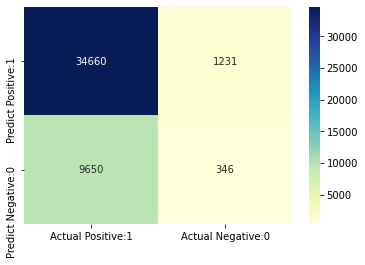

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86     35891
           1       0.22      0.03      0.06      9996

    accuracy                           0.76     45887
   macro avg       0.50      0.50      0.46     45887
weighted avg       0.66      0.76      0.69     45887



In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7635
Test set score: 0.7629


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


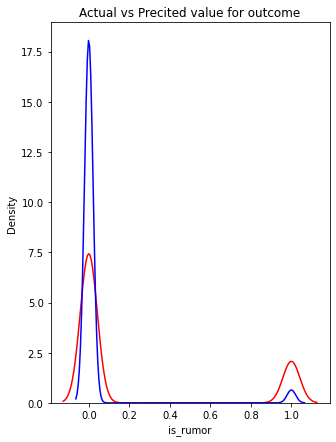

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
ax = sns.distplot(df['is_rumor'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

**k-nearest neighbors(KNN) Classifier** 

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     35891
           1       0.67      0.48      0.56      9996

    accuracy                           0.84     45887
   macro avg       0.77      0.71      0.73     45887
weighted avg       0.82      0.84      0.82     45887



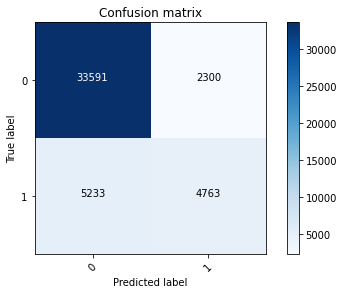

In [ ]:
#k-nearest neighbors (KNN) classifier 

classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred =  classifier.predict(X_test)
y_pred
class_names=np.array(['0','1'])

# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range (cm.shape[0]):
      for j in range (cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm= confusion_matrix(y_test,y_pred)
cm
plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))


In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))
print('f1 score:')
print(f1_score(y_test,y_pred))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred))

Our criterion give a result of 0.5483596485208593
f1 score:
0.5584149129491763
Accuracy score:
0.8358358576503149


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' rumours / ' + str(cm[1][1]+cm[1][0]) + ' total rumours.')
print('\nSo, the probability to detect a rumour is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 4763 rumours / 9996 total rumours.

So, the probability to detect a rumour is 0.4764905962384954
the accuracy is : 0.8358358576503149


In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[33591  2300]
 [ 5233  4763]]

True Positives(TP) =  33591

True Negatives(TN) =  4763

False Positives(FP) =  2300

False Negatives(FN) =  5233


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


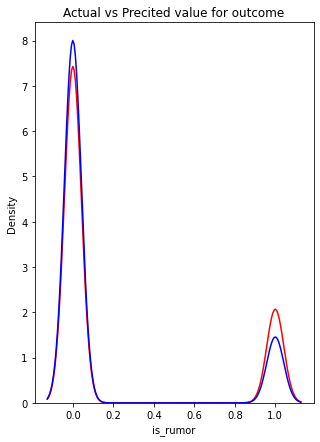

In [ ]:
#Actual vs Precited value niplot

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
ax = sns.distplot(df['is_rumor'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

**Decision Tree Classifier**

In [ ]:
#Decision Tree classifier


#Training model


from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
from sklearn.metrics import accuracy_score
print('Accuracy score:')
accuracy_score(y_test,predictions)


              precision    recall  f1-score   support

           0       0.89      0.88      0.89     35891
           1       0.59      0.61      0.60      9996

    accuracy                           0.82     45887
   macro avg       0.74      0.75      0.74     45887
weighted avg       0.83      0.82      0.82     45887

[[31594  4297]
 [ 3864  6132]]
Accuracy score:


0.8221500642883606

Confusion matrix

 [[31594  4297]
 [ 3864  6132]]

True Positives(TP) =  31594

True Negatives(TN) =  6132

False Positives(FP) =  4297

False Negatives(FN) =  3864


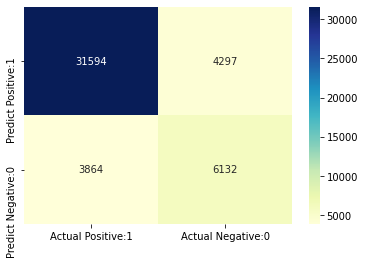

In [ ]:
cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


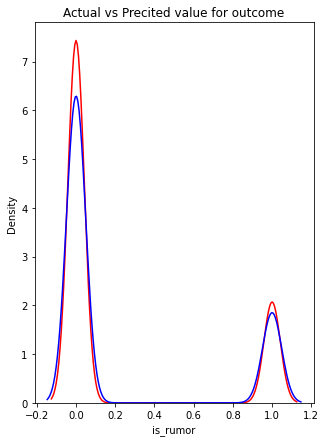

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
ax = sns.distplot(df['is_rumor'], hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

**Logistic Regression Classifier**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88     35891
           1       0.00      0.00      0.00      9996

    accuracy                           0.78     45887
   macro avg       0.39      0.50      0.44     45887
weighted avg       0.61      0.78      0.69     45887

f1 score:
0.0
Accuracy:
0.7821605247673633
Confusion matrix

 [[35891     0]
 [ 9996     0]]

True Positives(TP) =  35891

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  9996


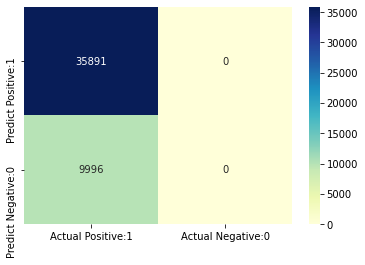

In [ ]:
#Logistic Regression classifier

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

y_pred = logmodel.predict(X_test)
print('f1 score:')
print(f1_score(y_test,y_pred))
print('Accuracy:')
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Selecting the best Classifier**

According to the models implemented above, k-nearest neighbors (KNN) Classifier yields the best results. It has an accuracy of 0.83 and f1 score of 0.55. So, this model best suits our project.